# Chapter 7: IoT Security  

# Use Case 1: Intelligent Host Intrusion Detection in IoT

# Model: LSTM

# Step 1: Dataset

The dataset (.CSV file) on CPU utilisation of a computing system (say Raspberry Pi 3) is available in the chapter's use-case-1 folder.

# Step 2: Dataset Exploration

time
2019-05-04 19:42:00    44.8
2019-05-04 19:43:00    44.0
2019-05-04 19:44:00    43.6
2019-05-04 19:45:00    43.2
2019-05-04 19:46:00    44.0
2019-05-04 19:47:00    43.2
2019-05-04 19:48:00    45.2
2019-05-04 19:49:00    44.8
2019-05-04 19:50:00    43.6
2019-05-04 19:51:00    42.4
Name: cpu utilisation (%), dtype: float64


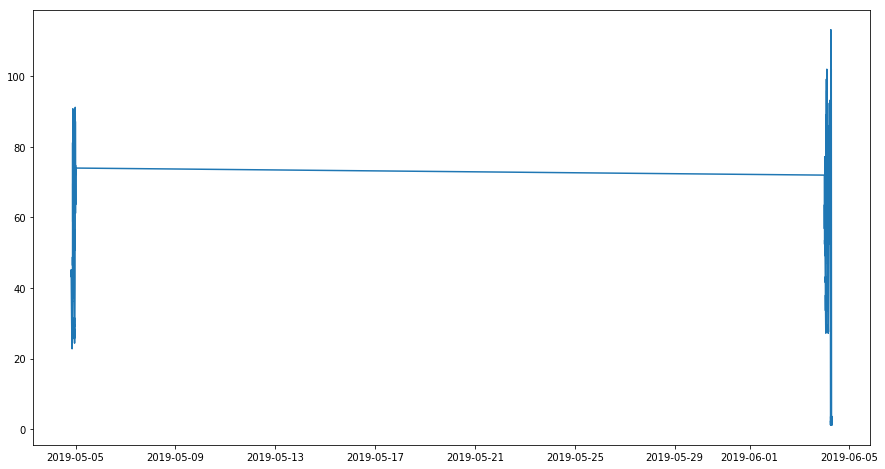

In [9]:
from pandas import Series
from matplotlib import pyplot
# This is to show plot 
%matplotlib inline
series = Series.from_csv('cpu-utilisation.csv', header=0)
print(series.head(10))
plt.figure(figsize=(15,8))
pyplot.plot(series)
pyplot.show()


# Step 3: Pre-processing

The dataset we got are pre-processed as we can see from the data exploration above. Lets move to next step.

# Step 4: Model Training and Validation 

In [3]:
#Imort necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint


epochs = 100
batch_size = 50

# Each training data point will be length 100-1,
# since the last value in each sequence is the label
sequence_length = 100

# OMP error issue fixing (some machine may show error)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


# Input data generation
    
def prepare_data(data, train_start, train_end, test_start, test_end):
    print("Length of Data", len(data))

    # training data
    print("Preparaing training data...")

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)
    result, result_mean = normalize(result)

    print("Training data shape  : ", result.shape)

    train = result[train_start:train_end, :]
    np.random.shuffle(train)
    X_train = train[:, :-1]
    y_train = train[:, -1]

    # test data
    print("Creating test data...")

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)
    result, result_mean = normalize(result)

    print("Test data shape  : {}".format(result.shape))

    X_test = result[:, :-1]
    y_test = result[:, -1]

    print("Shape X_train", np.shape(X_train))
    print("Shape X_test", np.shape(X_test))

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test



Using TensorFlow backend.


# Generate the Model

In [5]:
# Model genration function

def generate_model():

    model = Sequential()

    # First LSTM layer defining the input sequence length
    model.add(LSTM(input_shape=(sequence_length-1, 1),
                   units=32,
                   return_sequences=True))
    model.add(Dropout(0.2))

    # Second LSTM layer with 128 units
    model.add(LSTM(units=128,
                   return_sequences=True))
    model.add(Dropout(0.2))

    # Third LSTM layer with 100 units
    model.add(LSTM(units=100,
                   return_sequences=False))
    model.add(Dropout(0.2))

    # Densely-connected output layer with the linear activation function
    model.add(Dense(units=1))
    model.add(Activation('linear'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    
    return model

# Run the Model

Loading data... 
Length of Data 700
Preparaing training data...
Training data shape  :  (500, 100)


/Users/raz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Creating test data...
Test data shape  : (200, 100)
Shape X_train (500, 99)
Shape X_test (200, 99)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Training...
Instructions for updating:
Use tf.cast instead.
Train on 475 samples, validate on 25 samples
Epoch 1/100
475/475 [==============================] - 26s 54ms/step - loss: 0.4510 - val_loss: 0.2644

Epoch 00001: loss improved from inf to 0.45098, saving model to lstm-results/checkpoint-02.hdf5
Epoch 2/100
475/475 [==============================] - 15s 31ms/step - loss: 0.2690 - val_loss: 0.1661

Epoch 00002: loss improved from 0.45098 to 0.26896, saving model to lstm-results/checkpoint-02.hdf5
Epoch 3/100
475/475 [==============================] - 16s 33ms/step - loss: 0.1865 - val_loss: 0.1908

Epoch 00003: loss improved from 0.26896 to 0.18654, saving model to lstm-results/checkpoint-02.hdf5
E

475/475 [==============================] - 16s 33ms/step - loss: 0.0958 - val_loss: 0.0874

Epoch 00041: loss did not improve from 0.08283
Epoch 42/100
475/475 [==============================] - 17s 35ms/step - loss: 0.0871 - val_loss: 0.0543

Epoch 00042: loss did not improve from 0.08283
Epoch 43/100
475/475 [==============================] - 15s 33ms/step - loss: 0.0944 - val_loss: 0.0837

Epoch 00043: loss did not improve from 0.08283
Epoch 44/100
475/475 [==============================] - 14s 29ms/step - loss: 0.0911 - val_loss: 0.0824

Epoch 00044: loss did not improve from 0.08283
Epoch 45/100
475/475 [==============================] - 15s 31ms/step - loss: 0.0885 - val_loss: 0.0737

Epoch 00045: loss did not improve from 0.08283
Epoch 46/100
475/475 [==============================] - 16s 33ms/step - loss: 0.0778 - val_loss: 0.0575

Epoch 00046: loss improved from 0.08283 to 0.07781, saving model to lstm-results/checkpoint-02.hdf5
Epoch 47/100
475/475 [==========================

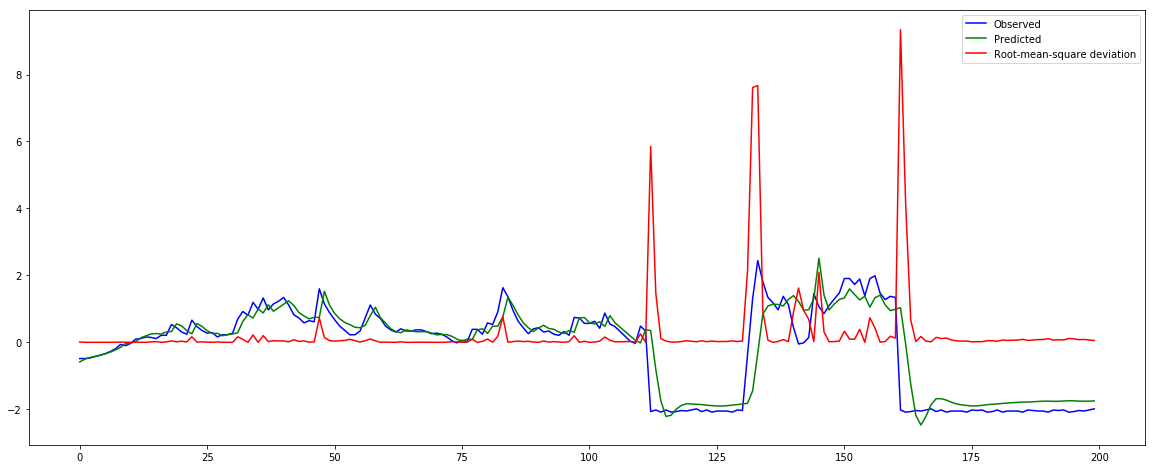

In [6]:
# Function for result normalisation
def normalize(result):
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean



## Function for running the model

def run_model(model=None, data=None):
    #global_start_time = time.time()

    print('Loading data... ')
    data_b = pd.read_csv('cpu-utilisation.csv',
                         parse_dates=[0], infer_datetime_format=True)
    data = data_b['cpu utilisation (%)'].as_matrix()

    # train on first 700 samples and test on next 300 samples (test set has anomaly)
    X_train, y_train, X_test, y_test = prepare_data(data, 0, 600, 400, 700)
    
    # tensor board setting 
    tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

    if model is None:
        model = generate_model()

    try:
        print("Training...")
        checkpointer = ModelCheckpoint(filepath="lstm-results/checkpoint-02.hdf5", 
                                         verbose=1, save_best_only=True, monitor='loss')
        model.fit(
                X_train, y_train,
                batch_size=batch_size, epochs=epochs, callbacks=[checkpointer, tensorboard],validation_split=0.05)
        print("Predicting...")
        
        predicted = model.predict(X_test)
        #model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=1, callbacks=[checkpointer, tensorboard])

        print("Reshaping predicted")
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print("Prediction exception")
        #print('Training duration:{}'.format(time.time() - global_start_time))
        return model, y_test, 0

    try:
        plt.figure(figsize=(20,8))
        plt.plot(y_test[:len(y_test)], 'b', label='Observed')
        plt.plot(predicted[:len(y_test)], 'g', label='Predicted')
        plt.plot(((y_test - predicted) ** 2), 'r', label='Root-mean-square deviation')
        plt.legend()
        plt.show()
    except Exception as e:
        print("plotting exception")
        print(str(e))
    #print('Training duration:{}'.format(time.time() - global_start_time))

    return model, y_test, predicted

# Call the run function
    
model, y_test, predicted = run_model()